In [1]:
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
new_df = pd.read_csv('patients_representations.txt', header=None, sep='\t')
new_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,TCGA-OR-A5L5,-3.071129,-1.521155,-4.312594,0.317408,0.075320,1.363128,-0.482169,1.147504,0.987113,...,1.432616,-0.303620,0.634279,-0.653863,1.356120,-1.245307,0.503684,0.606373,-0.047561,TCGA-ACC
1,TCGA-OR-A5K4,-1.903285,-2.275031,-4.435184,1.167579,-1.766490,0.940776,0.756230,2.344744,1.525056,...,2.594209,-2.439517,-0.026293,-0.286261,-0.072171,0.709209,3.868359,0.263770,-1.710119,TCGA-ACC
2,TCGA-OR-A5JR,-1.760934,-1.775001,-6.906105,0.654723,-1.312938,1.683623,-0.026703,1.986329,2.004427,...,4.148437,-1.741284,-0.373680,-0.181835,1.755915,-1.357962,3.503982,-1.639054,-3.784872,TCGA-ACC
3,TCGA-OR-A5JY,-3.142059,-2.532973,-3.580446,0.762644,-0.034451,2.354641,-1.140081,2.026736,1.505507,...,3.495167,-2.046229,-1.853134,-3.110803,1.174992,-0.934705,1.595203,0.679098,-0.702679,TCGA-ACC
4,TCGA-OR-A5LJ,-2.608011,-0.945775,-5.847663,1.052274,-0.641101,2.098448,-0.343712,0.976184,2.050795,...,6.123571,-1.677775,0.465319,-1.895150,0.221038,1.343193,2.636491,-1.886380,-3.356909,TCGA-ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,TCGA-V4-A9EE,-0.930030,-2.075389,2.740073,0.215267,-1.786446,-1.847131,1.201240,1.638628,-1.542900,...,0.971050,-0.068076,0.384372,0.151185,0.580056,-0.269160,0.612435,-1.205837,-1.082505,TCGA-UVM
10001,TCGA-V4-A9EK,-2.471629,-0.028685,1.141015,-1.837676,0.171456,-2.038547,-0.425520,0.635409,-0.597510,...,0.281200,-0.399432,-1.506346,0.464340,0.923431,0.551325,0.705393,-0.804116,-0.344467,TCGA-UVM
10002,TCGA-V4-A9EY,-0.095418,-2.424816,3.558917,-0.199006,-0.168417,-1.040711,0.619488,0.958011,-1.607989,...,-0.189907,-0.478186,-1.101683,-0.026636,1.162467,-0.550851,1.179778,-1.064900,0.088425,TCGA-UVM
10003,TCGA-V4-A9EH,-2.461718,-0.824790,1.195121,-1.452409,0.007172,-1.346472,-0.358131,1.010978,-1.070617,...,0.775234,-0.800736,-1.429762,0.332856,0.112912,1.067005,-0.403499,-0.281048,-0.959449,TCGA-UVM


In [3]:
data_X = new_df.iloc[:, 1:25]
y = new_df.iloc[:,26]
y

0        TCGA-ACC
1        TCGA-ACC
2        TCGA-ACC
3        TCGA-ACC
4        TCGA-ACC
           ...   
10000    TCGA-UVM
10001    TCGA-UVM
10002    TCGA-UVM
10003    TCGA-UVM
10004    TCGA-UVM
Name: 26, Length: 10005, dtype: object

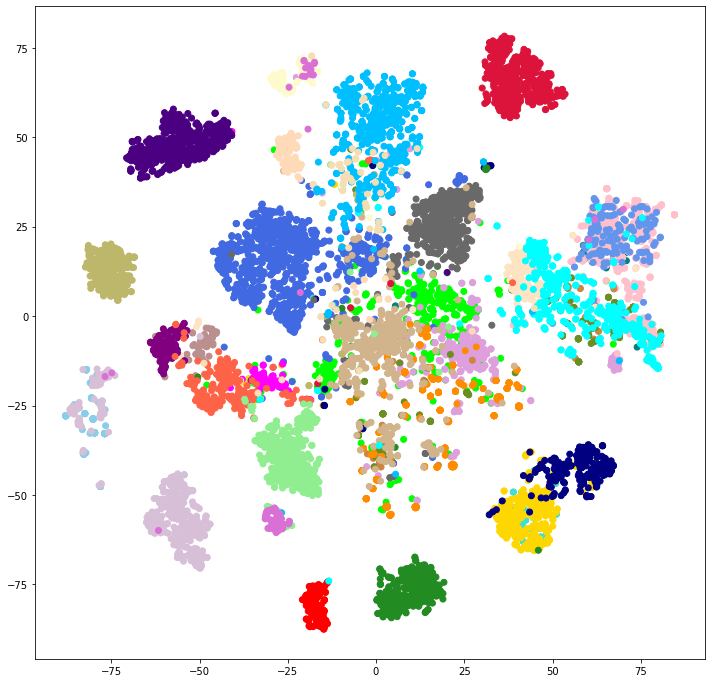

In [4]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':y})
tsne_df['digit'] =tsne_df['digit'].astype('category').cat.codes
u = tsne_df['digit'].to_numpy()


plt.figure(figsize=(12,12))
plt.scatter(tsne_obj[:,0],tsne_obj[:,1], c=['rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','rosybrown','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','lime','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue',
                                            'royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','plum','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','teal','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink',
    'pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','peru','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','olivedrab','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
    'darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','gold','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','navy','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','red','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle',
    'thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','thistle','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray',
    'dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','tan','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','fuchsia','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki',
    'darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','darkkhaki','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','crimson','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
    'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua',
    'aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','aqua','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','lemonchiffon','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff',
    'peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','peachpuff','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue',
    'deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','wheat','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid','orchid'])
# plt.savefig('tsne_cancerTypes_colored_new.pdf', format='pdf', bbox_inches='tight')